<a href="https://colab.research.google.com/github/Spurthi2005/ADM-LAB/blob/main/Project_ADM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TEAM 1
   2303A51802
   2303A51059
   2303A51980
   2303A51559
   2303A510E2

# 🌍 Analyzing Global Air Quality Trends Using Data Visualization in Python

## 📌 Project Overview

Air pollution is a pressing global concern with direct impacts on public health, climate, and ecosystems. This project aims to analyze global air quality trends using real-world datasets and powerful visualization tools in Python. By studying key pollutants and their variations across regions and time, we seek to uncover hidden patterns and generate insights to support better policy and awareness.

---

## 🎯 Objectives

- Analyze global air quality metrics (PM2.5, PM10, NO2, CO, SO2, O3) across different countries and time periods.
- Visualize seasonal variations and long-term trends in air pollution levels.
- Compare air quality between cities and regions with varying environmental regulations.
- Investigate correlations between pollution, population density, industrial activity, and public health indices.

---

## 🗂️ Datasets

We will use datasets from the following trusted sources:

- [Kaggle](https://www.kaggle.com)
- [OpenAQ](https://openaq.org)
- [World Health Organization (WHO)](https://www.who.int)

The datasets include pollutant concentrations measured over time across multiple global locations.

---

## 🧰 Tools and Libraries

The following Python libraries will be used for data analysis and visualization:

- **Pandas** – for data manipulation and analysis.
- **Matplotlib** – for static plotting.
- **Seaborn** – for statistical visualizations.
- **Plotly** – for interactive visualizations and dashboards.

---

## 📈 Expected Outcomes

- Visual insights into how air pollution levels change over time and across regions.
- Identification of seasonal trends and anomalies (e.g., effects of lockdowns).
- Comparisons between cities/countries with different levels of urbanization and policy enforcement.
- Correlation analysis between pollution levels and external variables like population density or health data.

---

## 🧭 Project Flow

1. **Define project goals**
2. **Load and explore data**
3. **Clean and preprocess the data**
4. **Perform visual and statistical analysis**
5. **Interpret results and generate conclusions**

---

*Let’s begin by exploring and preparing the data!* 🚀


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
file_path = "/content/global_air_quality_data_10000.csv"
df = pd.read_csv(file_path)

In [ ]:
df.head()

,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
0,Bangkok,Thailand,2023-03-19,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76
1,Istanbul,Turkey,2023-02-16,50.63,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36
2,Rio de Janeiro,Brazil,2023-11-13,130.21,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87
3,Mumbai,India,2023-03-16,119.70,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71
4,Paris,France,2023-04-04,55.20,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16


##  Basic Cleaning & Data Types

In [ ]:
print(df.isnull().sum())
df.info()

if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')


City           0
Country        0
Date           0
PM2.5          0
PM10           0
NO2            0
SO2            0
CO             0
O3             0
Temperature    0
Humidity       0
Wind Speed     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         10000 non-null  object 
 1   Country      10000 non-null  object 
 2   Date         10000 non-null  object 
 3   PM2.5        10000 non-null  float64
 4   PM10         10000 non-null  float64
 5   NO2          10000 non-null  float64
 6   SO2          10000 non-null  float64
 7   CO           10000 non-null  float64
 8   O3           10000 non-null  float64
 9   Temperature  10000 non-null  float64
 10  Humidity     10000 non-null  float64
 11  Wind Speed   10000 non-null  float64
dtypes: float64(9), object(3)
memory usage: 937.6+ KB


 Summary Statistics & Key Metrics

In [ ]:
pollutants = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']
df[pollutants].describe()


,PM2.5,PM10,NO2,CO,SO2,O3
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,77.448439,104.438161,52.198649,5.047984,25.344490,106.031643
std,41.927871,55.062396,27.320490,2.852625,14.091194,55.081345
min,5.020000,10.000000,5.010000,0.100000,1.000000,10.040000
25%,41.185000,57.137500,28.347500,2.560000,13.190000,58.380000
50%,77.725000,103.690000,52.100000,5.090000,25.350000,106.055000
75%,113.392500,152.265000,75.705000,7.480000,37.500000,153.982500
max,149.980000,200.000000,100.000000,10.000000,49.990000,200.000000


Time-Series Visualization: PM2.5 Over Time

In [ ]:

print(df.columns)


Index(['City', 'Country', 'Date', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3',
       'Temperature', 'Humidity', 'Wind Speed'],
      dtype='object')


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df_time = df.dropna(subset=['Date', 'PM2.5'])

df_time['month'] = df_time['Date'].dt.to_period('M')
monthly_pm25 = df_time.groupby('month')['PM2.5'].mean().reset_index()
monthly_pm25['month'] = monthly_pm25['month'].astype(str)

import plotly.express as px
fig = px.line(monthly_pm25, x='month', y='PM2.5',
              title='Average Global PM2.5 Over Time',
              labels={'month': 'Month', 'PM2.5': 'PM2.5 (µg/m³)'})
fig.show()


Top 10 Countries by Average PM2.5

<ipython-input-17-34fcacc8ef01>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




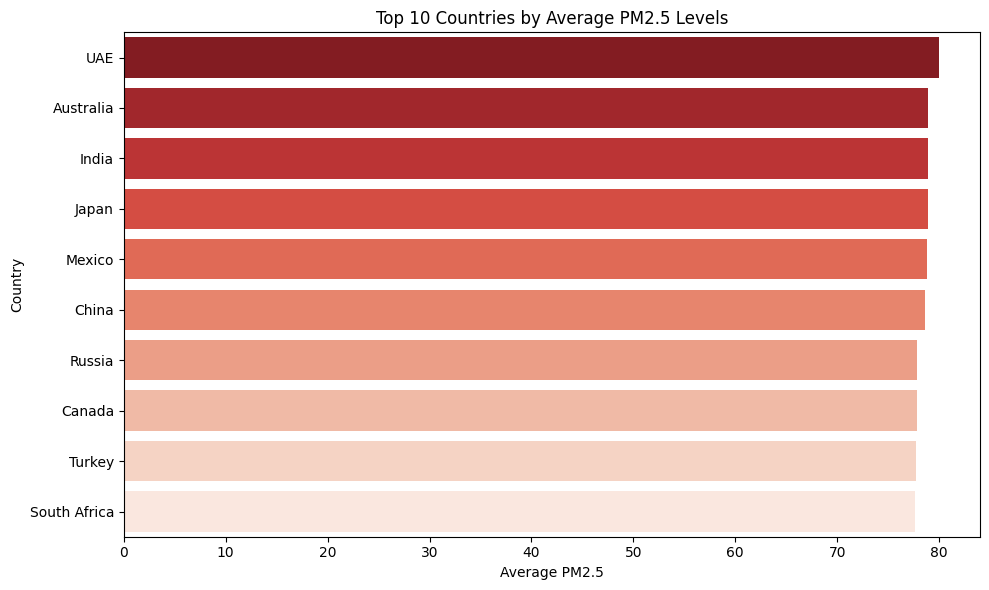

In [ ]:
if 'Country' in df.columns:
    country_avg = df.groupby("Country")["PM2.5"].mean().sort_values(ascending=False).head(10)

    plt.figure(figsize=(10,6))
    sns.barplot(x=country_avg.values, y=country_avg.index, palette="Reds_r")
    plt.title("Top 10 Countries by Average PM2.5 Levels")
    plt.xlabel("Average PM2.5")
    plt.ylabel("Country")
    plt.tight_layout()
    plt.show()


📊 1. Stacked Bar Chart – Pollution Composition by City

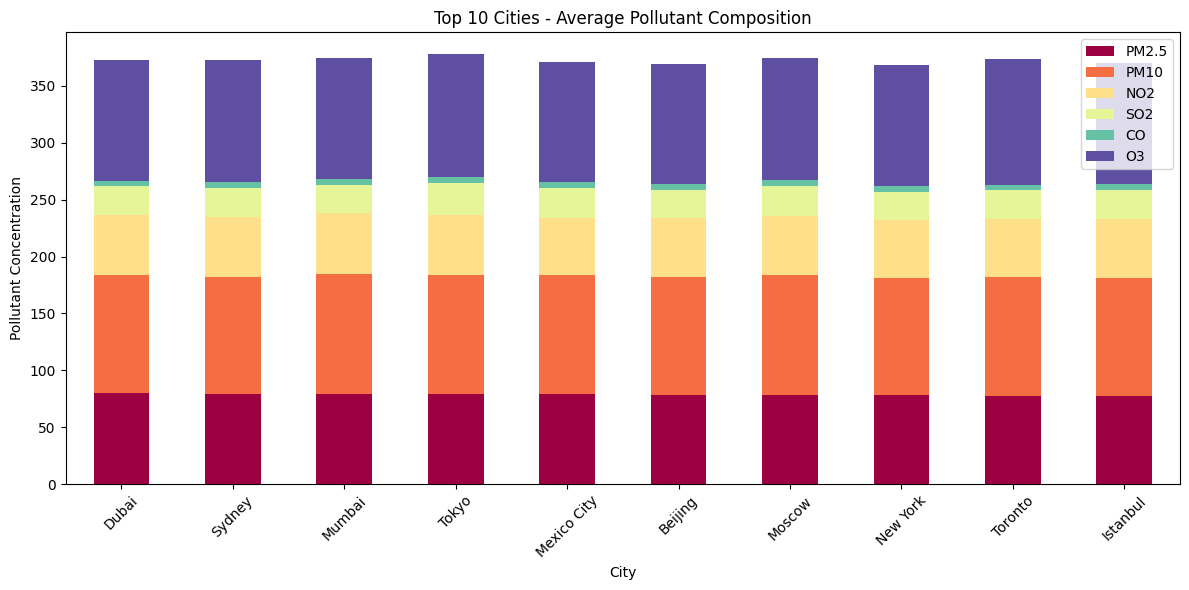

In [ ]:
import matplotlib.pyplot as plt

pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']
avg_pollution_city = df.groupby('City')[pollutants].mean().sort_values(by='PM2.5', ascending=False).head(10)

avg_pollution_city.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Spectral')
plt.title("Top 10 Cities - Average Pollutant Composition")
plt.ylabel("Pollutant Concentration")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


📈 2. Time Series Line Plot – PM2.5 Over Time

Available cities: ['Bangkok' 'Istanbul' 'Rio de Janeiro' 'Mumbai' 'Paris' 'Los Angeles'
 'Tokyo' 'New York' 'London' 'Seoul' 'Cairo' 'Mexico City' 'Berlin'
 'Beijing' 'Sydney' 'Dubai' 'Toronto' 'Madrid' 'Johannesburg' 'Moscow']


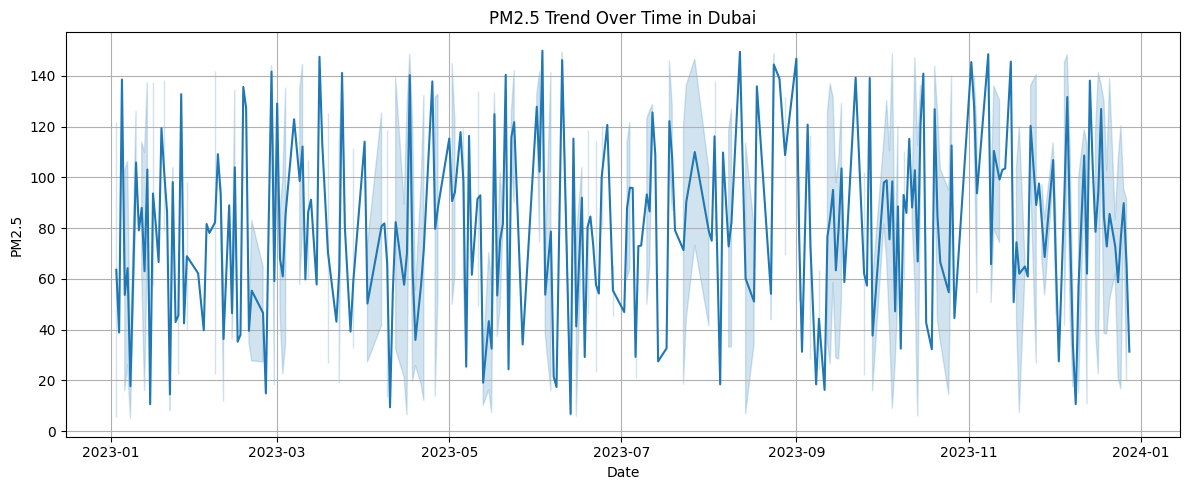

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df_clean = df.dropna(subset=['Date', 'PM2.5'])
print("Available cities:", df_clean['City'].unique())

city = 'Dubai'

city_df = df_clean[df_clean['City'] == city]

if city_df.empty:
    print(f"No data available for city: {city}")
else:

    plt.figure(figsize=(12, 5))
    sns.lineplot(x='Date', y='PM2.5', data=city_df)
    plt.title(f"PM2.5 Trend Over Time in {city}")
    plt.ylabel("PM2.5")
    plt.xlabel("Date")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


🌀 3. Heatmap – Correlation Between Pollution & Weather

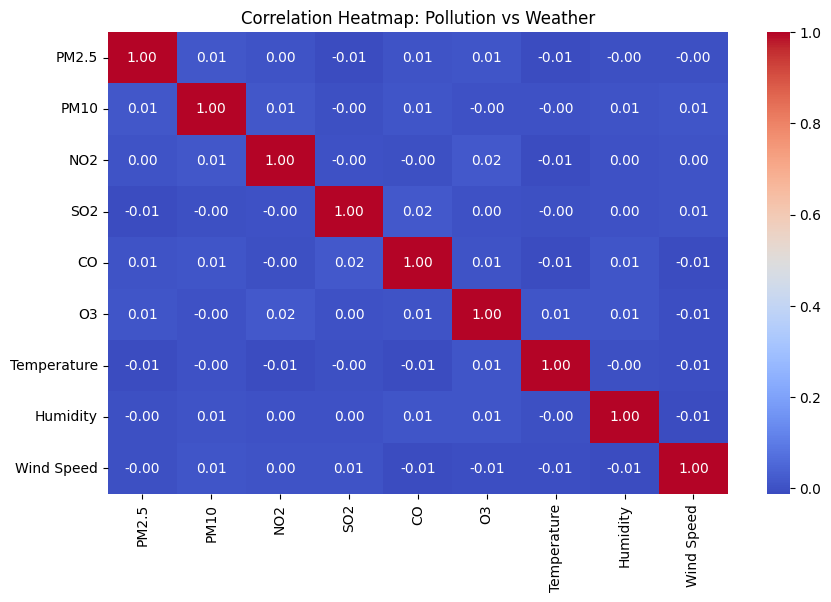

In [ ]:
import seaborn as sns

corr_features = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'Temperature', 'Humidity', 'Wind Speed']
corr = df[corr_features].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Pollution vs Weather")
plt.show()


📌 4. Pollution vs Temperature – Scatter Plot with Hue

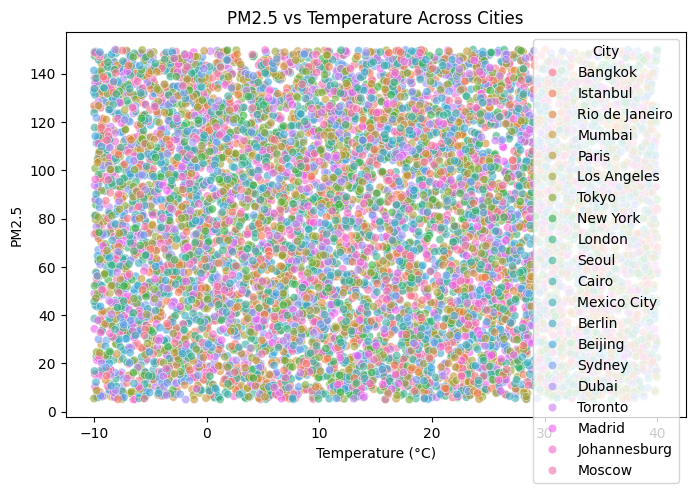

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Temperature', y='PM2.5', hue='City', alpha=0.6)
plt.title("PM2.5 vs Temperature Across Cities")
plt.xlabel("Temperature (°C)")
plt.ylabel("PM2.5")
plt.show()


🎯 5. Radar Chart – Pollution Profile per Country

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']
country_avg = df.groupby('Country')[pollutants].mean()


countries = ['India', 'China', 'USA']
fig = go.Figure()

for country in countries:
    fig.add_trace(go.Scatterpolar(
        r=country_avg.loc[country].values,
        theta=pollutants,
        fill='toself',
        name=country
    ))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True)),
    title="Pollution Radar Comparison by Country",
    showlegend=True
)
fig.show()


## ✅ Conclusion

This project analyzed global air quality using Python visualizations. We explored key pollutants like PM2.5, PM10, NO2, SO2, CO, and O3 across cities and time. Our visualizations revealed seasonal trends, differences in pollution levels between cities, and strong correlations with weather conditions. This helps us better understand pollution patterns and supports data-driven environmental decisions.